In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os

In [2]:
filtered_data = pd.read_csv("~/Desktop/Spring 2024/POLI179/poli 179 data/People's daily/final_data.csv")
                            
prediction_data = pd.read_csv("~/Desktop/Spring 2024/POLI179/poli 179 data/People's daily/Prediction Result/predictions.csv")

Positive emotions correspond to 0
neutral emotions correspond to 1
negative emotions correspond to 2

In [3]:
merged_data = pd.merge(filtered_data, prediction_data, on='id', how='inner')

In [4]:
# Map the numerical labels to their corresponding emotion categories
emotion_mapping = {0: 'Positive', 1: 'Neutral', 2: 'Negative'}
merged_data['Emotion'] = merged_data['prediction'].map(emotion_mapping)

In [5]:
emotion_counts = merged_data.groupby(['Year', 'Emotion']).size().unstack(fill_value=0)

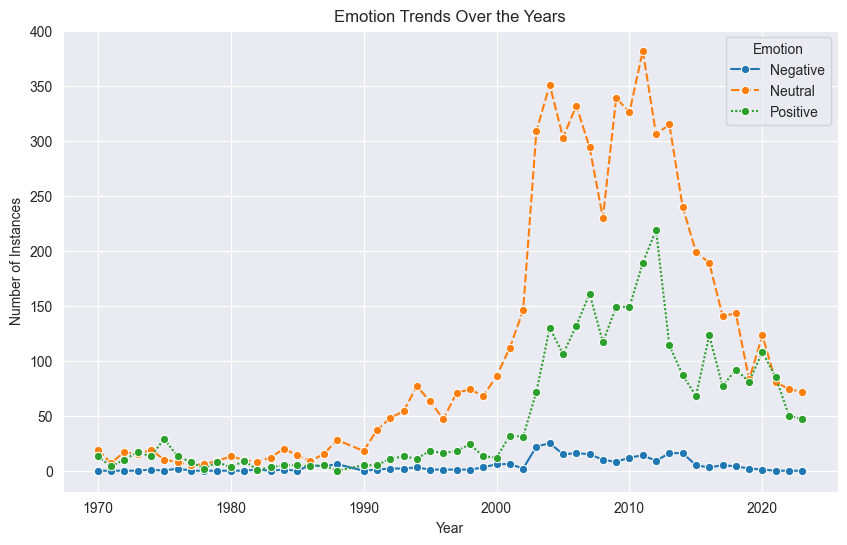

In [6]:
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=emotion_counts, marker='o')  # Change to sns.barplot if you prefer a bar chart
plt.title('Emotion Trends Over the Years')
plt.ylabel('Number of Instances')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='Emotion')
plt.show()

In [7]:
keywords = ["移民", "流动人口", "外地人", "民工", "进城务工人员", "新市民", "盲流", "随迁子女", "落户", "户口迁移", "人口迁移","流浪乞讨人员","城乡移民"]

In [8]:
matplotlib.rc('font', family='Songti SC', weight='bold')

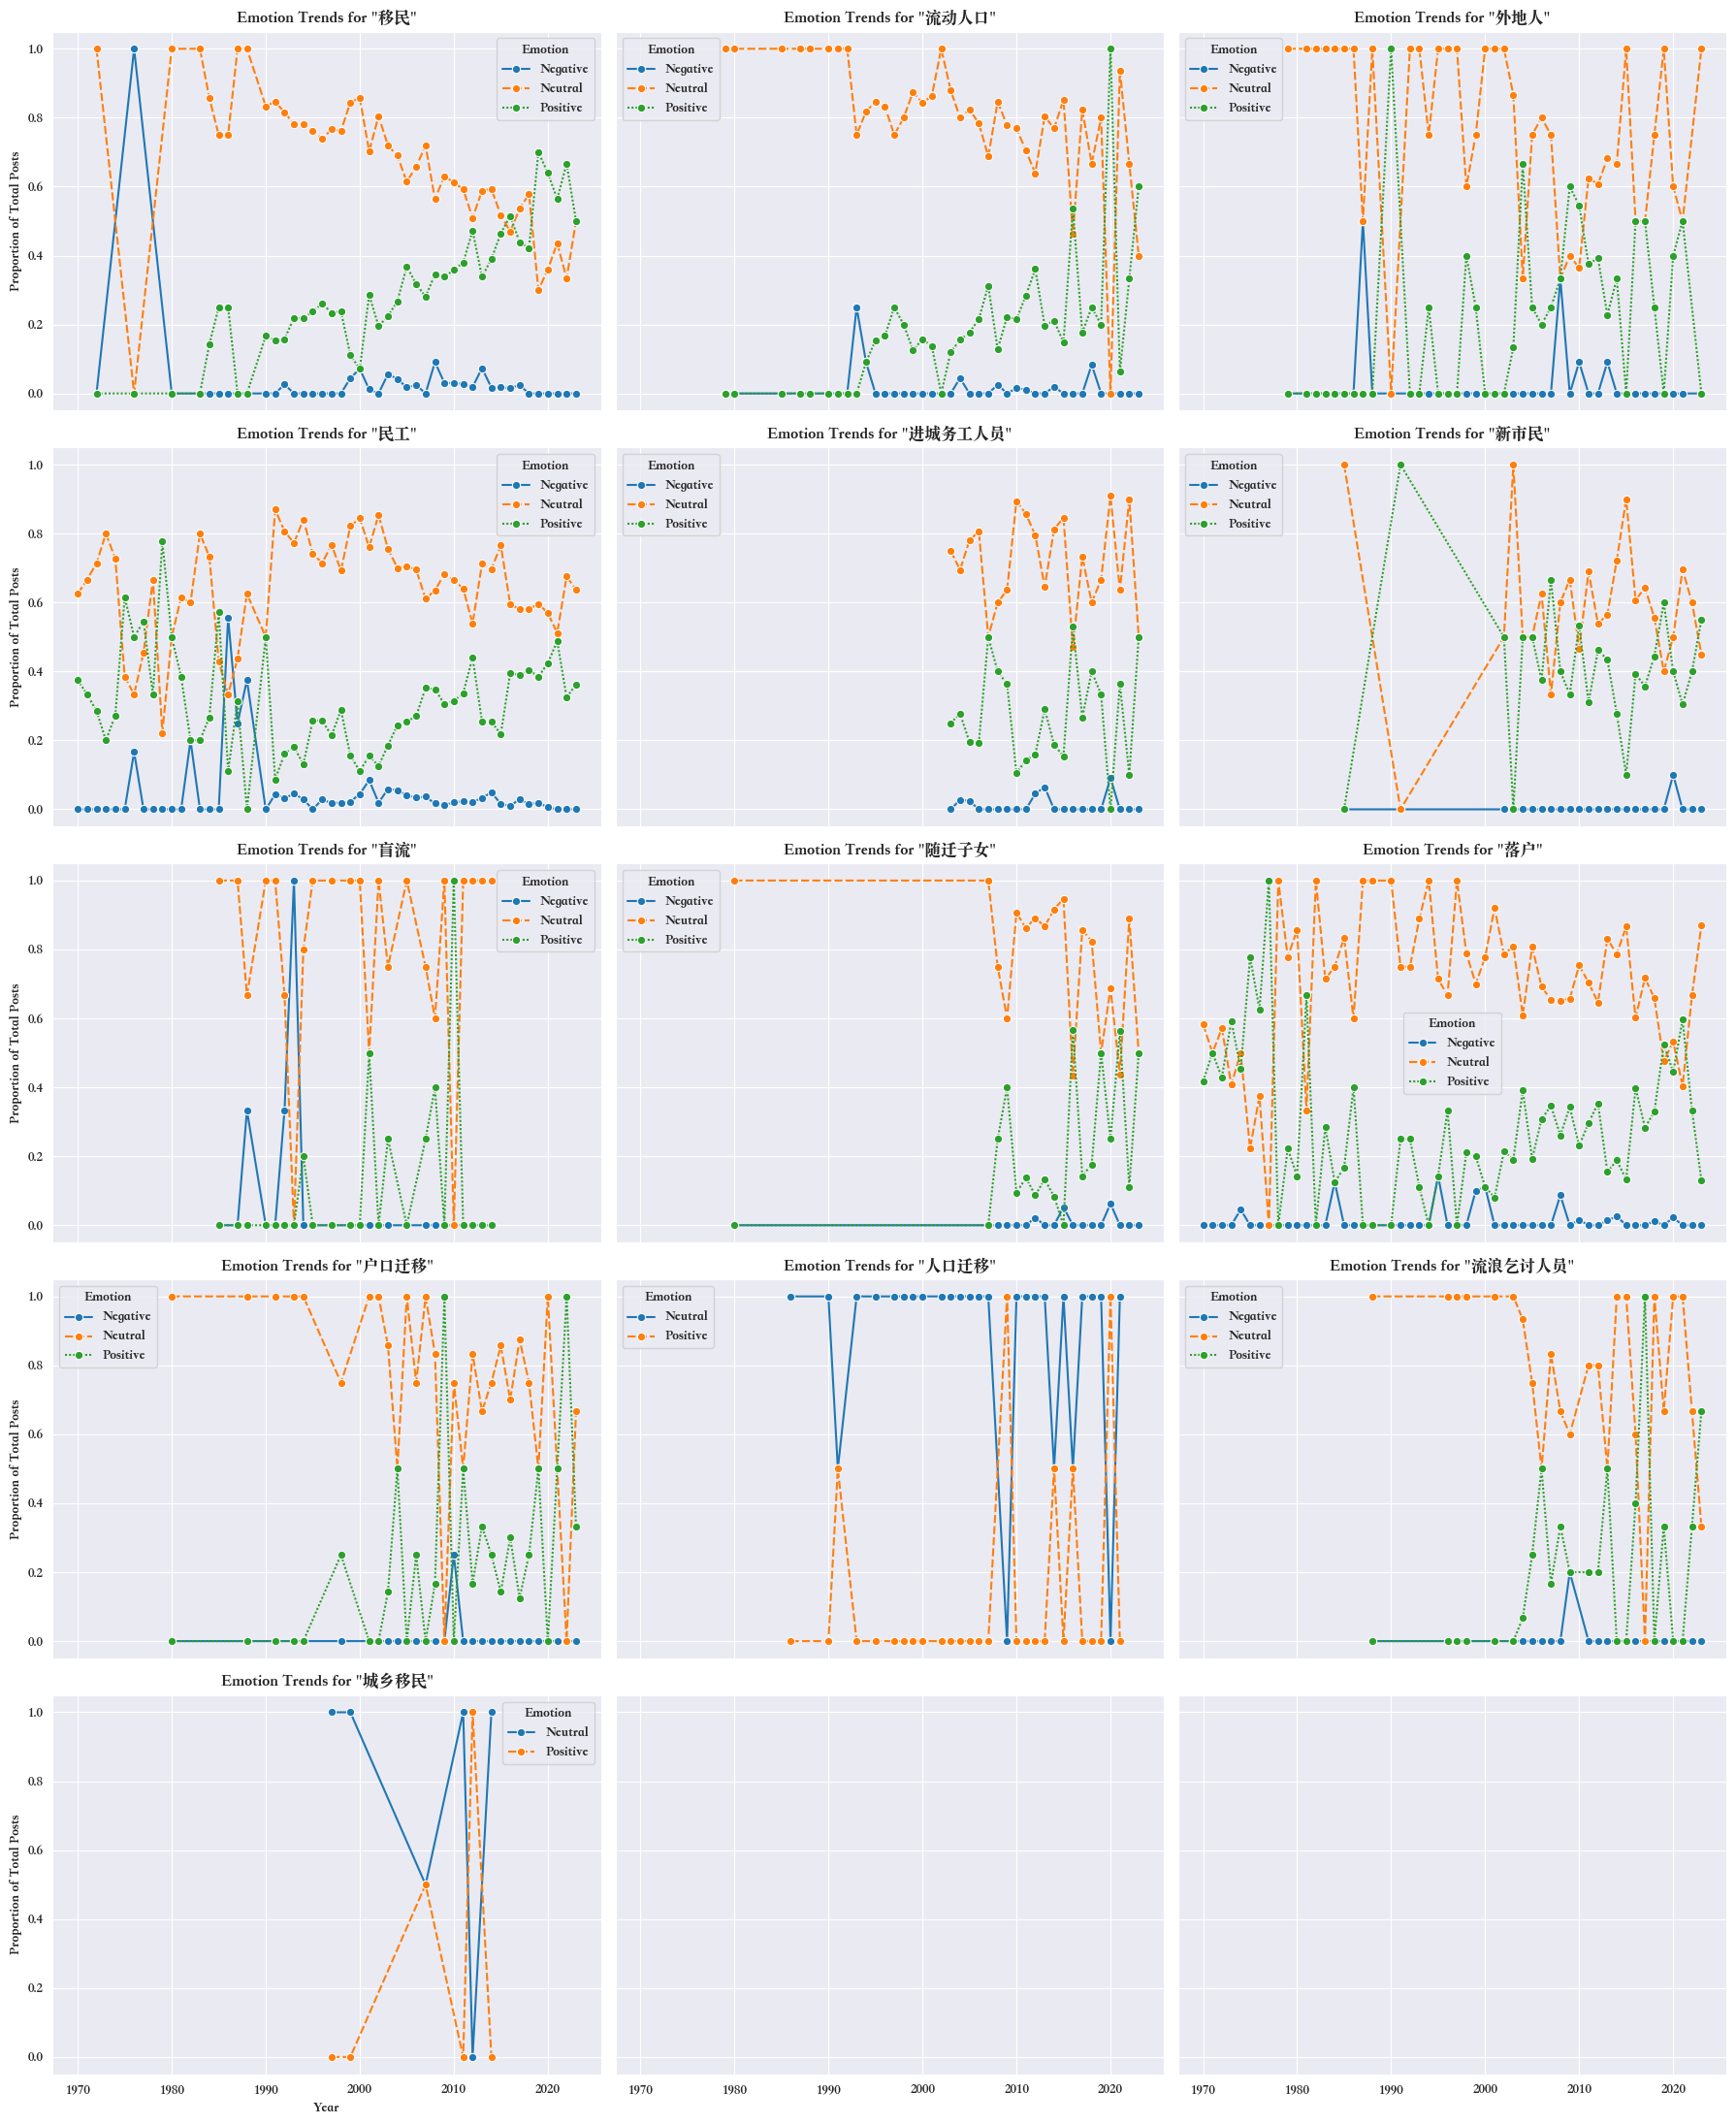

In [13]:
# Figure setup
merged_data['PostCount']=1
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 22), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten if using more than one row to make indexing easier

for index, keyword in enumerate(keywords):
    # Filter data containing the keyword
    keyword_data = merged_data[merged_data['TextBody'].str.contains(keyword)]

    # Group by Year and Emotion, sum the PostCount
    emotion_counts = keyword_data.groupby(['Year', 'Emotion'])['PostCount'].sum().unstack(fill_value=0)

    # Calculate total posts per year for the filtered data
    total_posts_per_year = keyword_data.groupby('Year')['PostCount'].sum()

    # Normalize the counts by the total posts per year
    normalized_emotion_counts = emotion_counts.divide(total_posts_per_year, axis=0)
    
    # Plotting on subplots
    ax = axes[index]
    sns.lineplot(data=normalized_emotion_counts, marker='o', ax=ax)
    ax.set_title(f'Emotion Trends for "{keyword}"')
    ax.set_ylabel('Proportion of Total Posts')
    ax.set_xlabel('Year')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

WordCloud

In [14]:
import jieba
from wordcloud import WordCloud

In [72]:
stopwords_files = ['baidu_stopwords.txt', 'cn_stopwords.txt', 'hit_stopwords.txt', 'scu_stopwords.txt']
stopwords = set()
for filename in stopwords_files:
    file_path = os.path.join('/Users/therealu/Desktop/Spring 2024/POLI179/poli 179 data/Stopwords', filename)
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        stopwords.update([line.strip() for line in file.readlines()])
        
additional_stopwords = {'年', '月', '日', '第版', '说', '中', '更','年 月 日','月 日','时','我国','杨丽','总','这是','记者','做','里','一年','包括','年月日','一是',
                        '二是','要','新','亿元','没','岁','想', '应','一种','郑', '走','老', '前','干','吃','越来越','记者','进一步','元','来到','找','事','带','买','成','住','本版','本报记者','达','占','镇','村','名','区','来到','一条','建成','性','绣','黄花','去年','提出','介绍'}  
stopwords.update(additional_stopwords)

print("Total stopwords loaded:", len(stopwords))

Total stopwords loaded: 2374


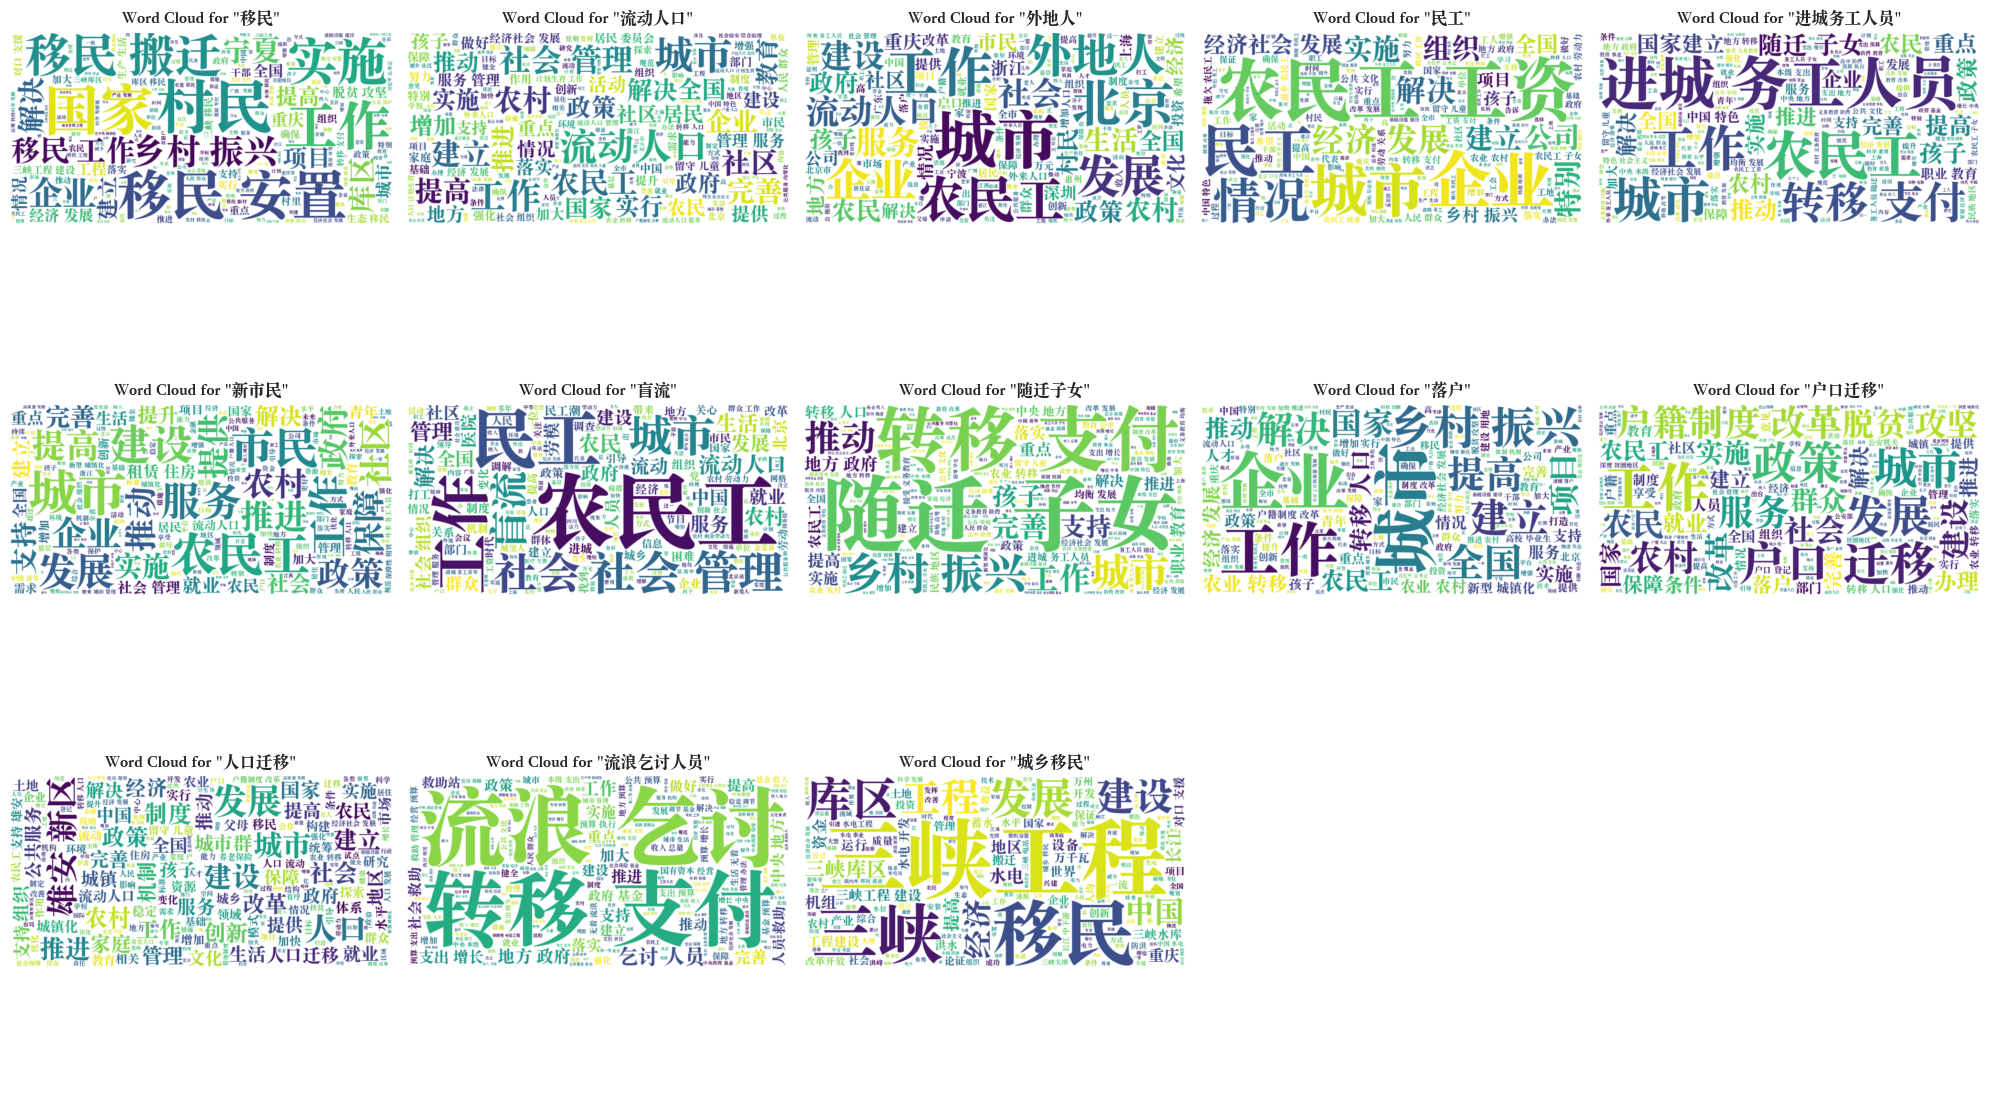

In [73]:
# Ensure that matplotlib can handle Chinese characters
matplotlib.rc('font', family='Songti SC')

# Assuming 'merged_data' is loaded and contains 'TextBody'
# Define the keywords
keywords = ["移民", "流动人口", "外地人", "民工", "进城务工人员", "新市民", "盲流", "随迁子女", "落户", "户口迁移", "人口迁移", "流浪乞讨人员", "城乡移民"]

# Initialize a figure to plot multiple word clouds
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))  # Adjust grid size based on number of keywords
axes = axes.flatten()  # Flatten axes array for easier iteration

for index, keyword in enumerate(keywords):
    # Filter texts that contain the current keyword
    filtered_texts = merged_data[merged_data['TextBody'].str.contains(keyword)]['TextBody']

    # Join all texts into a single string
    combined_text = ' '.join(filtered_texts)

    # Use Jieba to split the combined text into words
    words = jieba.cut(combined_text, cut_all=False)
    filtered_words = [word for word in words if word not in stopwords]
    word_counts = ' '.join(filtered_words)  # Join words for word cloud

    # Create a word cloud
    wordcloud = WordCloud(font_path='/System/Library/Fonts/Supplemental/Songti.ttc',
                          width=800, height=400,
                          background_color='white').generate(word_counts)
    
    # Display the word cloud
    ax = axes[index]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for "{keyword}"')

# Adjust unused subplots
for ax in axes[len(keywords):]:
    ax.axis('off')
plt.tight_layout()
plt.show()


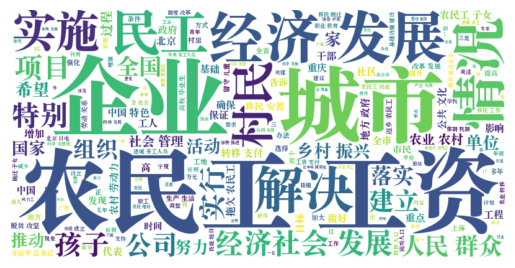

In [74]:
# Assuming 'merged_data' is already defined
# Join all texts into a single string
combined_text = ' '.join(merged_data['TextBody'])

# Use Jieba to split the combined text into words
words = jieba.cut(combined_text, cut_all=False)

# Filter out stopwords from the words
filtered_words = [word for word in words if word not in stopwords]
word_counts = ' '.join(filtered_words)  # Join words for word cloud

# Create a word cloud
wordcloud = WordCloud(font_path='/System/Library/Fonts/Supplemental/Songti.ttc',
                      width=800, height=400,
                      background_color='white').generate(word_counts)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()